# 라이브러리 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [3]:
corona = pd.read_csv("./data/covid_19_clean_complete.csv")
corona.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


# 데이터 프레임 정보 확인

In [4]:
corona.info() # 49068건의 데이터 확인 / Non-Null Count -> Dtype -> 컬럼 분석
# object는 대부분 문자열, 파이썬 객체 // Dtype- object: float, int, date 타입 => 문자열(날짜 형식도 문자열)
# 문자열 타입의 date라면 년도, 월, 일 등을 추출할 수 없음 -> 변환해야 함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


## 결측값(NaN) 확인하는 팁

In [5]:
corona.isnull().sum() # isnull뒤에 sum을 붙이면 컬럼별로 결측값 확인 가능

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

# 데이터 타입 수정하기
* `Date` 컬럼이 날짜 타입(`datetime`) 형식으로 안되어 있으니까 바꿔주자 

    => info()에서 미리 확인하기

In [8]:
corona['Date'] = pd.to_datetime(corona['Date']) # to_는 형 변환함수 => 데이터 형을 변환해주는 함수 
# TO_CHAR(날짜 or 숫자, "원하는 형태") // 기능: 날짜 또는 숫자를 문자로 형 변환한다.
# 형식: TO_DATE // 기능: 날짜처럼 생겼지만 데이터형이 날짜가 아니라 문자인 데이터를 날짜 데이터형으로 바꿔준다.
# ex. SQL ver. SELECT TO_DATE('2020/02/04') FROM DUAL; => 결과: 20/02/04(데이터형:날짜)
corona.info() 
# ns => second까지 분류

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


# 코로나 국가별 최근 확진자, 사망자, 회복자 데이터 분석


## 최근 데이터 추출

In [10]:
# 최근 날짜 마스크 만들기
recent_mask = corona['Date'] == max(corona['Date']) # Date칼럼을 분석 -> 최근 데이터는 날짜가 제일 큰 것으로 추출
# 열에 대한 설명은 없으니 loc생략해도 된다.

# 최근 데이터만 추출
corona_recent = corona[recent_mask] 
corona_recent.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


## 국가별 합계 구하기

In [17]:
column_names = ["Confirmed", "Deaths", "Recovered"]

corona_recent_sum_by_country = corona_recent.groupby("Country/Region")[column_names].sum() # confirmed는 누적 확진자
corona_recent_sum_by_country.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,36263,1269,25198
Albania,4880,144,2745
Algeria,27973,1163,18837
Andorra,907,52,803
Angola,950,41,242


In [19]:
corona_recent_sum_by_country = corona_recent_sum_by_country.reset_index() 
corona_recent_sum_by_country.head()
# reset 함수 - index를 풀어서 (기존 인덱스가 아닌) 정수 인덱스 형태로 변환함

,index,Country/Region,Confirmed,Deaths,Recovered
0,0,Afghanistan,36263,1269,25198
1,1,Albania,4880,144,2745
2,2,Algeria,27973,1163,18837
3,3,Andorra,907,52,803
4,4,Angola,950,41,242


# 사망자가 많은 순으로 정렬

In [24]:
# corona_recent_sum_by_country["Deaths"].sort_index(ascending="True") // 처음 생각했던 게 맞긴 했어..
# by, sort_index... 공부하기!
# corona_recent_sum_by_country.head()

corona_death_sort = corona_recent_sum_by_country.sort_values(by="Deaths", ascending=False)
corona_death_sort

,index,Country/Region,Confirmed,Deaths,Recovered
173,173,US,4290259,148011,1325804
23,23,Brazil,2442375,87618,1846641
177,177,United Kingdom,301708,45844,1437
111,111,Mexico,395489,44022,303810
85,85,Italy,246286,35112,198593
...,...,...,...,...,...
94,94,Laos,20,0,19
68,68,Greenland,14,0,13
30,30,Cambodia,226,0,147
69,69,Grenada,23,0,23


In [25]:
corona_death_sort.style.background_gradient(cmap='Reds')

,index,Country/Region,Confirmed,Deaths,Recovered
173,173,US,4290259,148011,1325804
23,23,Brazil,2442375,87618,1846641
177,177,United Kingdom,301708,45844,1437
111,111,Mexico,395489,44022,303810
85,85,Italy,246286,35112,198593
79,79,India,1480073,33408,951166
61,61,France,220352,30212,81212
157,157,Spain,272421,28432,150376
132,132,Peru,389717,18418,272547
81,81,Iran,293606,15912,255144


# 시간에 따른 확진자, 사망자, 회복자

## 날짜별 확진자, 사망자, 회복자 합계 구하기

In [29]:
 corona_date = corona
 column_names = ["Confirmed", "Deaths", "Recovered"]
 corona_date_sum = corona.groupby("Date")[column_names].sum()
 corona_date_sum.head()

#corona_date = corona() ~~~~

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52


## 시간에 따른 누적 확진자, 사망자, 회복자 시각화


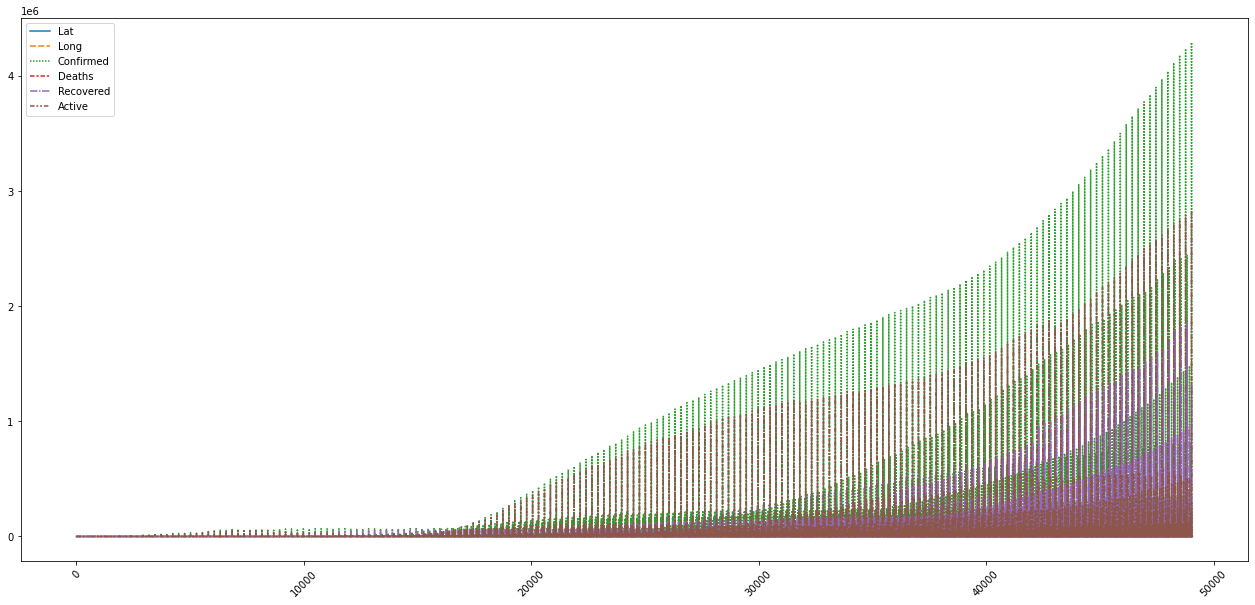

In [32]:
plt.figure(figsize=(22, 10)) # 분포는 scatter 플롯, 추이는line 플롯, 카테고리별 가지고 있는 값 bar플롯, 빈도수는 히스토그램 플롯
plt.xticks(rotation=45)
sns.lineplot(data=corona_date) # x축, y축의 숫자는 tick
plt.show()

# folium을 이용한 지도 시각화 
*전세계 지도를 표현할 수 있음*

## folium 사용방법

In [35]:
import folium

f_map = folium.Map()
f_map

## folium으로 월드메르디앙 빌딩 찍어보기

In [40]:
location = [37.5256967,126.888587] 

f_map = folium.Map(location = location) # []가 아닌 ()임! ==> 주의하기!
f_map

#### 확대

In [41]:
f_map = folium.Map(location=location, zoom_soom_start=20)
f_map

### 마커 활용하기 - 기본마커

In [42]:
f_map = folium.Map(location=location, zoom_soom_start=17)

folium.Marker(
    location=location, # 마커의 좌표
    popup="코딩지옥", # 마커 클릭하면 나오는 팝업 메세지
    icon=folium.Icon(color="red", icon="star") # 아이콘 모양
).add_to(f_map)

f_map

### 원형 마커 -- 특정 값에 대한 세력을 보여줄 때 사용
ex. 코로나 분석 시, 확진자가 많으면 원이 크게, 적으면 원이 작게 표시

ex. 교통사고 다발 지역 시각화 예시

In [45]:
f_map = folium.Map(location=location, zoom_start=17)

folium.CircleMarker(
    location,
    radius=100, # 반지름값 // position argument
    color="#F7D358", # 테두리 색상 // RGB 컬러코드 검색해서, 원하는 색상 골라서 사용
    fill=True, # 기본값은 False // 원 안쪽 채우기 //True면 원 안쪽에 색이 채워짐
    fill_color="#08088A", # 원 안쪽 채울 색상
    popup="점심밥 먹는 곳"
).add_to(f_map)

f_map # 주소값(0x~~~~형태)은 나오지만, 지도가 나오지 않는다면 f_map을 출력하지 않아서이다.

## 전 세계 코로나 바이러스 감염지도 표시하기

In [46]:
corona_recent.head() 
# 목적 : 전 세계 코로나 바이러스 감염지도 표시하기 부터 시작X
# 과정부터 생각하는 것이 맞다
# 지도에 표시해 줄 것부터 만들기--데이터 필요
# 데이터 프레임이 있고 -> folium에 표시
# 1. Confirmned -> country/region -> Lat / Long 뽑기

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [47]:
column_names = ["Country/Region", "Lat", "Long", "Confirmed"] # 띄어쓰기, 괄호, 점이나 마침표 주의
corona_recent_data = corona_recent.loc[:, column_names]
corona_recent_data
# 인덱스 48807 ? => 0부터 시작하는 것이 확인하기 더 용이하기 때문에 수정하는 것이 좋다

,Country/Region,Lat,Long,Confirmed
48807,Afghanistan,33.939110,67.709953,36263
48808,Albania,41.153300,20.168300,4880
48809,Algeria,28.033900,1.659600,27973
48810,Andorra,42.506300,1.521800,907
48811,Angola,-11.202700,17.873900,950
...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,865
49064,Yemen,15.552727,48.516388,1691
49065,Comoros,-11.645500,43.333300,354
49066,Tajikistan,38.861000,71.276100,7235


### 인덱스 재구성 - `reset_index`

In [48]:
corona_recent_data.reset_index() # 원본 인덱스를 컬럼으로 따로 빼준다.

,index,Country/Region,Lat,Long,Confirmed
0,48807,Afghanistan,33.939110,67.709953,36263
1,48808,Albania,41.153300,20.168300,4880
2,48809,Algeria,28.033900,1.659600,27973
3,48810,Andorra,42.506300,1.521800,907
4,48811,Angola,-11.202700,17.873900,950
...,...,...,...,...,...
256,49063,Sao Tome and Principe,0.186400,6.613100,865
257,49064,Yemen,15.552727,48.516388,1691
258,49065,Comoros,-11.645500,43.333300,354
259,49066,Tajikistan,38.861000,71.276100,7235


In [50]:
corona_recent_data = corona_recent_data.reset_index(drop=True) # 원본 인덱스는 삭제하고 재구성 // 원래 4~~~~인덱스는 삭제
corona_recent_data.head() 

,Country/Region,Lat,Long,Confirmed
0,Afghanistan,33.93911,67.709953,36263
1,Albania,41.15330,20.168300,4880
2,Algeria,28.03390,1.659600,27973
3,Andorra,42.50630,1.521800,907
4,Angola,-11.20270,17.873900,950


In [60]:
import numpy as np
f_map = folium.Map(location=[0,0], zoom_start=3)

for idx in corona_recent_data.index:
    # 위경도
    lat = corona_recent_data["Lat"][idx] # idx는 배열 선택, idx번째 row를 뽑음
    lng = corona_recent_data["Long"][idx]
    # 나라이름
    c_name = corona_recent_data["Country/Region"][idx] # iloc으로 가져와도 상관없다
    # 누적 확진자
    confirmed = corona_recent_data["Confirmed"][idx]
    
    folium.CircleMarker(
        location=[lat,lng],
        radius=np.log(confirmed) *2, # radius 고정값으로 출력되기 때문에 세력은 표시되지 않는다. // radius=Confirmed => Error: Json~~
        # confirmed는 값이 너무 커져서 출력되지 않는다. => 확진자 수를 반지름으로 놓기에는, 확진자의 수가 너무 크다
        # confirmed / 50000 => 단위를 바꿔서 하면 출력은 되나 너무 크거나, 너무 작은 원이 생긴다.
        # log 사용 => 단위 차가 하나의 컬럼에서 너무 클 때 빈도수를 줄이기 위해 사용 
        # log10000 = 4, log1000 = 3, log100 =2 ==> 단위 스케일링 // 편차 줄이기 <- 수학은 센스!
        # 이후 원의 크키는 *를 사용해서 조절한다
        popup=f"{c_name} / {confirmed}",
        color='red',
        fill=True, # 제대로 입력했는데 Invalid Syntax라면 쉼표 누락하지 않았는지 다시 보자
        fill_color='red'
    ).add_to(f_map)
    

f_map # for문을 빠져나와서 실행시키기